In [1]:
from pckgConOpt.maes import MAES, epsMAgES, keep_range
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

from pckgConOpt import tuttestfunctions as ttf
from pckgConOpt import o1,o2,o3,o4

# no bound constraint handling
def noboundhand(y,lb, ub):
    return y

objective function: cop1
best fitness: 0
best constraint violation: 0
number of function evaluations: 10000


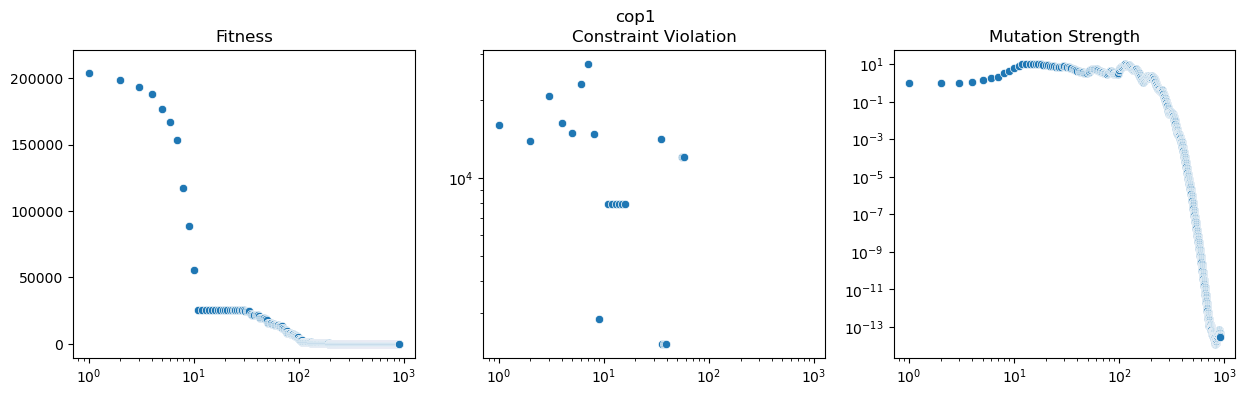

objective function: cop2
best fitness: 8.677e-30
best constraint violation: 48.03
number of function evaluations: 10000


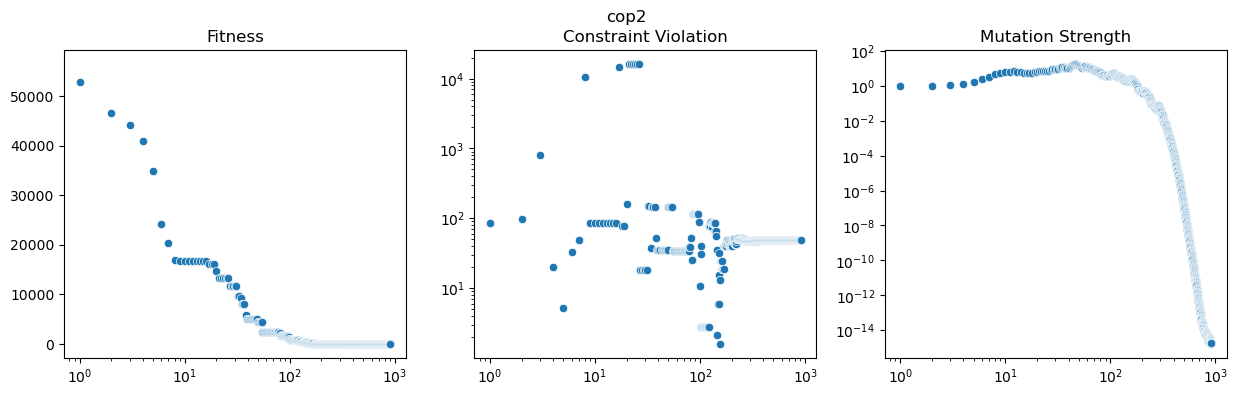

objective function: cop3
best fitness: 9.95
best constraint violation: 15.1
number of function evaluations: 10000


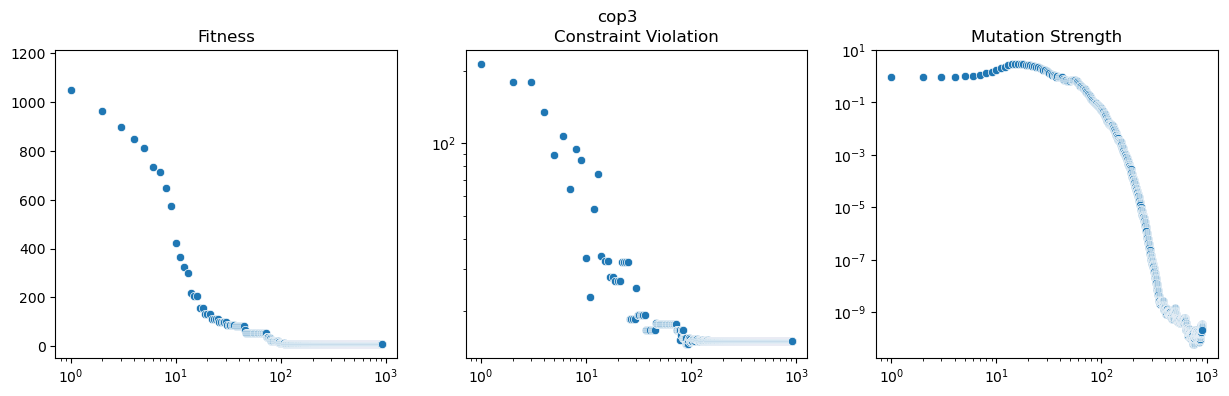

C:\Users\micha\anaconda3\envs\rise\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\micha\Documents\GitHub\es4cop\pckgConOpt\tuttestfunctions.py:56: RuntimeWarning: overflow encountered in square
  h = np.sum((y[:d-1] - y[1:d])**2)


objective function: cop4
best fitness: -4.784e+229
best constraint violation: inf
number of function evaluations: 10000


C:\Users\micha\anaconda3\envs\rise\Lib\site-packages\matplotlib\scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


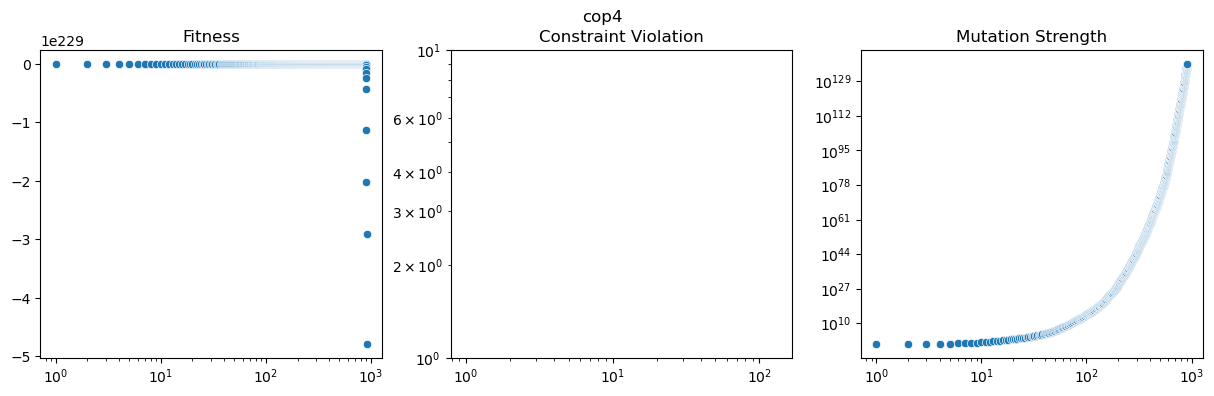

C:\Users\micha\Documents\GitHub\es4cop\pckgConOpt\tuttestfunctions.py:72: RuntimeWarning: overflow encountered in scalar multiply
  g3 = -x[1]*x[5]**4*x[2]*x[3]**(-3) + 1.93
C:\Users\micha\Documents\GitHub\es4cop\pckgConOpt\tuttestfunctions.py:73: RuntimeWarning: overflow encountered in scalar multiply
  g4 = -x[1]*x[6]**4*x[2]/x[4]**3 + 1.93
C:\Users\micha\Documents\GitHub\es4cop\pckgConOpt\maes.py:163: RuntimeWarning: invalid value encountered in multiply
  newpop_cv[k] = np.sum([np.sum(gv*(gv>0)), np.sum(np.abs(hv)*(np.abs(hv)>10**(-4)))])
C:\Users\micha\Documents\GitHub\es4cop\pckgConOpt\maes.py:178: RuntimeWarning: invalid value encountered in multiply
  cvParent = np.sum([np.sum(gv*(gv>0)), np.sum(np.abs(hv)*(np.abs(hv)>10**(-4)))])
C:\Users\micha\Documents\GitHub\es4cop\pckgConOpt\tuttestfunctions.py:68: RuntimeWarning: overflow encountered in scalar multiply
  f = 0.7854*x[0]*x[1]**2*(3.3333*x[2]**2 + 14.9334*x[2]-43.0934) - 1.508*x[0]*(x[5]**2 + x[6]**2) + \
C:\Users\micha\Doc

objective function: cop5
best fitness: -inf
best constraint violation: nan
number of function evaluations: 10000


C:\Users\micha\anaconda3\envs\rise\Lib\site-packages\matplotlib\axes\_base.py:2985: RuntimeWarning: overflow encountered in scalar subtract
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])
C:\Users\micha\anaconda3\envs\rise\Lib\site-packages\matplotlib\ticker.py:2417: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades


OverflowError: cannot convert float infinity to integer

<Figure size 1500x400 with 3 Axes>

In [2]:
### define parameters

# seed random number generator
default_rng = np.random.default_rng(123456)

# problem dimension
d = 10

# bound constraint handling
bch = noboundhand

# population parameters
mu = 3
lam = 10
sigma = 1.

# run parameters
maxIter = 10**3
budget = maxIter*lam

# problems
for objFun in [ttf.cop1, ttf.cop2, ttf.cop3, ttf.cop4, ttf.cop5]:
    if objFun == ttf.cop3:
        lower_bounds = -20*np.ones(shape=(d,))
        upper_bounds = 20*np.ones(shape=(d,))
    elif objFun == ttf.cop5:
        d = 7
        lower_bounds = np.array([2.6, 0.7, 17, 7.3, 7.3, 2.9, 5])
        upper_bounds = np.array([3.6, 0.8, 28, 8.3, 8.3, 3.9, 5.5])
    else:
        lower_bounds = -100*np.ones(shape=(d,))
        upper_bounds = 100*np.ones(shape=(d,))

    # random initial point
    x_init = lower_bounds + (upper_bounds - lower_bounds)*default_rng.uniform(size=(d,))

    # run MA-ES
    out = MAES(x_init,mu,lam,sigma,maxIter,budget, objFun, lower_bounds, upper_bounds, bch)
    gb_y, gb_fv, dyn_gen, dyn_fev, dyn_fit, dyn_cv,  dyn_sig, dyn_ynorm = out

    # print main results
    print('objective function: {0}'.format(objFun.__name__))
    print('best fitness: {0:.4g}'.format(gb_fv))
    print('best constraint violation: {0:.4g}'.format(dyn_cv[-1]))
    
    print('number of function evaluations: {0:d}'.format(dyn_fev[-1]))
    
    # visualize single run statistics
    fig, axs = plt.subplots(1,3,figsize=(15,4))
    
    cax = axs[0]
    sea.scatterplot(x=dyn_gen, y = dyn_fit, legend='full', ax=cax)
    cax.set_xscale('log')
    #cax.set_yscale('log')
    cax.set_title('Fitness')
    
    cax = axs[1]
    sea.scatterplot(x=dyn_gen, y = dyn_cv, legend='full', ax=cax)
    cax.set_xscale('log')
    cax.set_yscale('log')
    cax.set_title('Constraint Violation')
    
    cax = axs[2]
    sea.scatterplot(x=dyn_gen, y = dyn_sig, legend='full', ax=cax)
    cax.set_xscale('log')
    cax.set_yscale('log')
    cax.set_title('Mutation Strength')

    fig.suptitle(objFun.__name__)
    plt.show()

objective function: cop1
best fitness: 6.216e-28
best constraint violation: 0
number of function evaluations: 10000


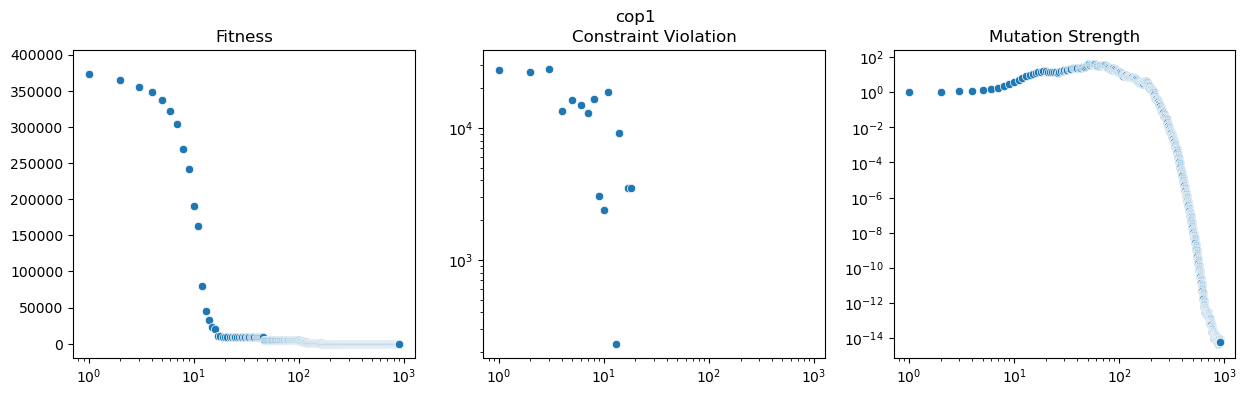

objective function: cop2
best fitness: 2.272e-28
best constraint violation: 2.768
number of function evaluations: 10000


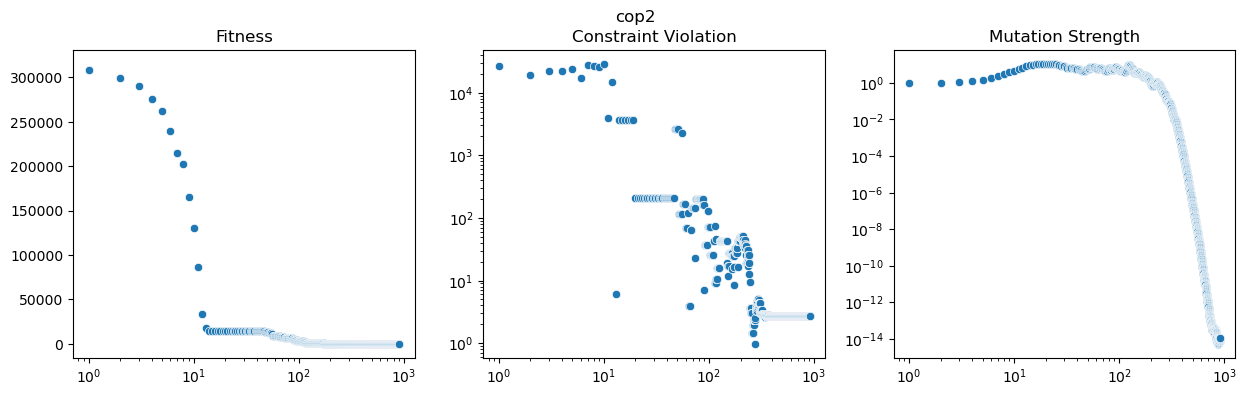

objective function: cop3
best fitness: 9.95
best constraint violation: 15.19
number of function evaluations: 10000


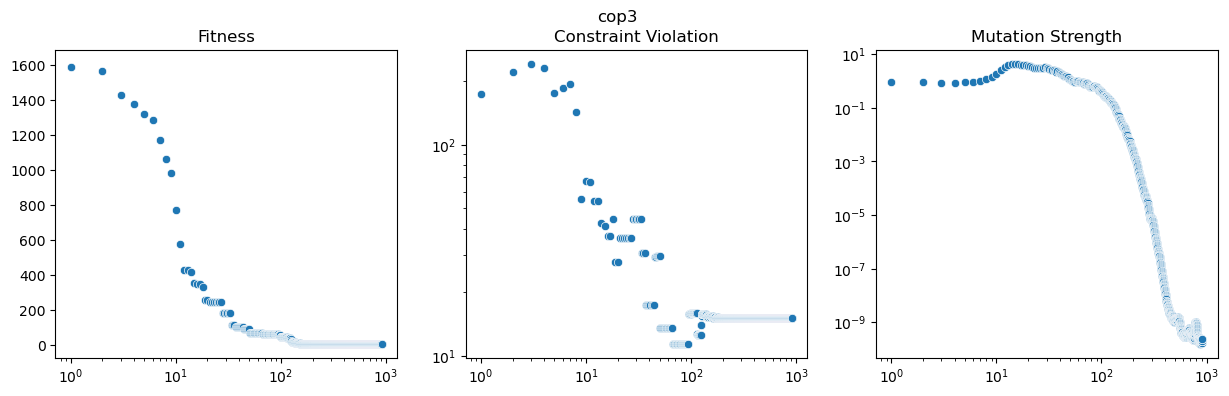

objective function: cop4
best fitness: -986.1
best constraint violation: 8.507e+19
number of function evaluations: 10000


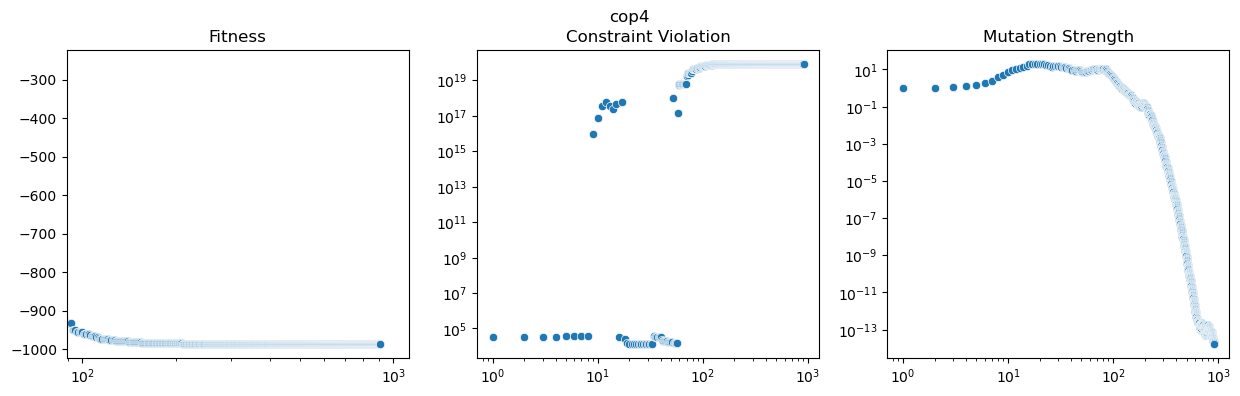

objective function: cop5
best fitness: 2427
best constraint violation: 765.6
number of function evaluations: 10000


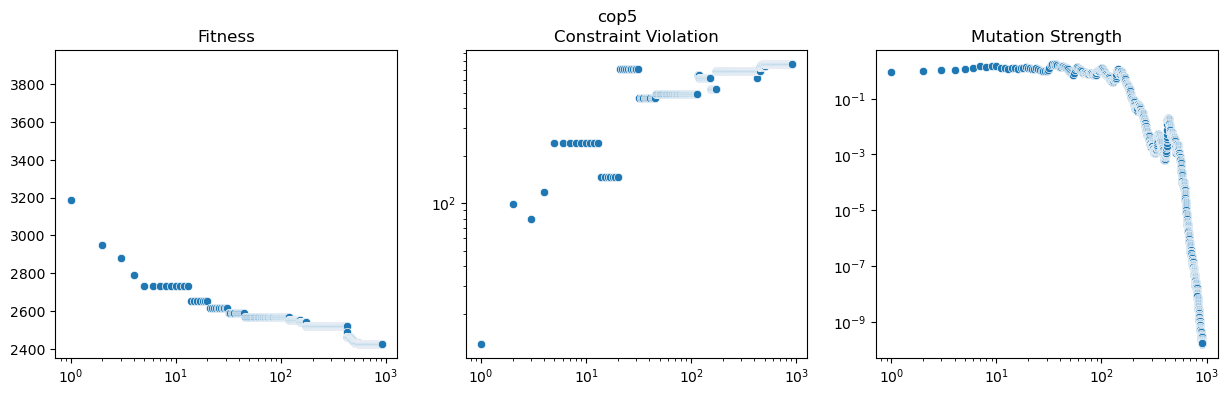

In [3]:
### define parameters

# problem dimension
d = 10

# bound constraint handling
bch = keep_range

# population parameters
mu = 3
lam = 10
sigma = 1.

# run parameters
maxIter = 10**3
budget = maxIter*lam

# problems
for objFun in [ttf.cop1, ttf.cop2, ttf.cop3, ttf.cop4, ttf.cop5]:
    if objFun == ttf.cop3:
        lower_bounds = -20*np.ones(shape=(d,))
        upper_bounds = 20*np.ones(shape=(d,))
    elif objFun == ttf.cop5:
        d = 7
        lower_bounds = np.array([2.6, 0.7, 17, 7.3, 7.3, 2.9, 5])
        upper_bounds = np.array([3.6, 0.8, 28, 8.3, 8.3, 3.9, 5.5])
    else:
        lower_bounds = -100*np.ones(shape=(d,))
        upper_bounds = 100*np.ones(shape=(d,))

    # random initial point
    x_init = lower_bounds + (upper_bounds - lower_bounds)*default_rng.uniform(size=(d,))

    # run MA-ES
    out = MAES(x_init,mu,lam,sigma,maxIter,budget, objFun, lower_bounds, upper_bounds, bch)
    gb_y, gb_fv, dyn_gen, dyn_fev, dyn_fit, dyn_cv,  dyn_sig, dyn_ynorm = out

    # print main results
    print('objective function: {0}'.format(objFun.__name__))
    print('best fitness: {0:.4g}'.format(gb_fv))
    print('best constraint violation: {0:.4g}'.format(dyn_cv[-1]))
    print('number of function evaluations: {0:d}'.format(dyn_fev[-1]))
    
    # visualize single run statistics
    fig, axs = plt.subplots(1,3,figsize=(15,4))
    
    cax = axs[0]
    sea.scatterplot(x=dyn_gen, y = dyn_fit, legend='full', ax=cax)
    cax.set_xscale('log')
    #cax.set_yscale('log')
    cax.set_title('Fitness')
    
    cax = axs[1]
    sea.scatterplot(x=dyn_gen, y = dyn_cv, legend='full', ax=cax)
    cax.set_xscale('log')
    cax.set_yscale('log')
    cax.set_title('Constraint Violation')
    
    cax = axs[2]
    sea.scatterplot(x=dyn_gen, y = dyn_sig, legend='full', ax=cax)
    cax.set_xscale('log')
    cax.set_yscale('log')
    cax.set_title('Mutation Strength')

    fig.suptitle(objFun.__name__)
    plt.show()